# WebAssembly and Edge Computing

## What Is WebAssembly

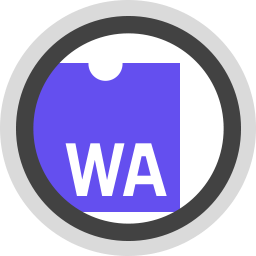

- Binary instruction format 
- Stack-based virtual machine
- Designed to run code at near-native speed
- Safe, efficient, and open standard
- Supports high-level languages
- Enabling powerful web and server applications
- Open & manage by consortium

## Why Now?

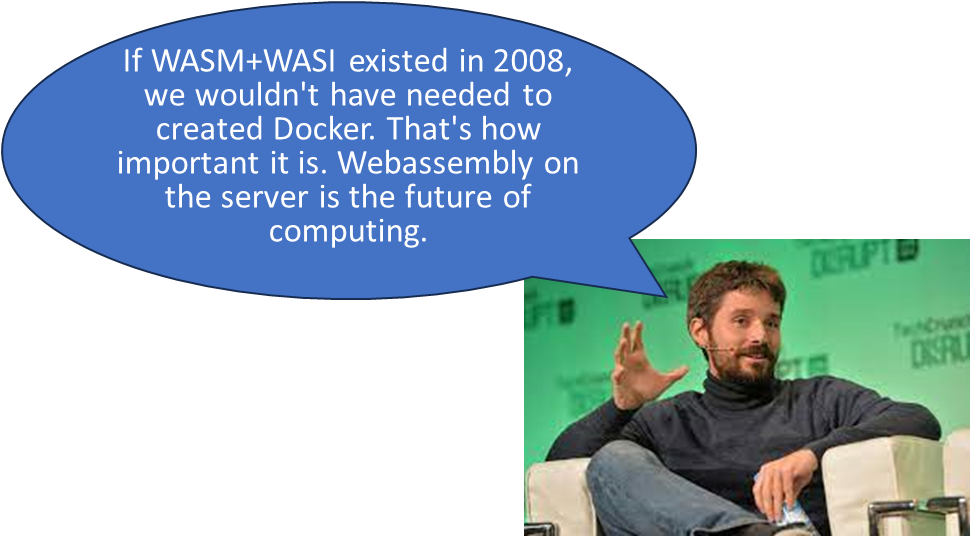

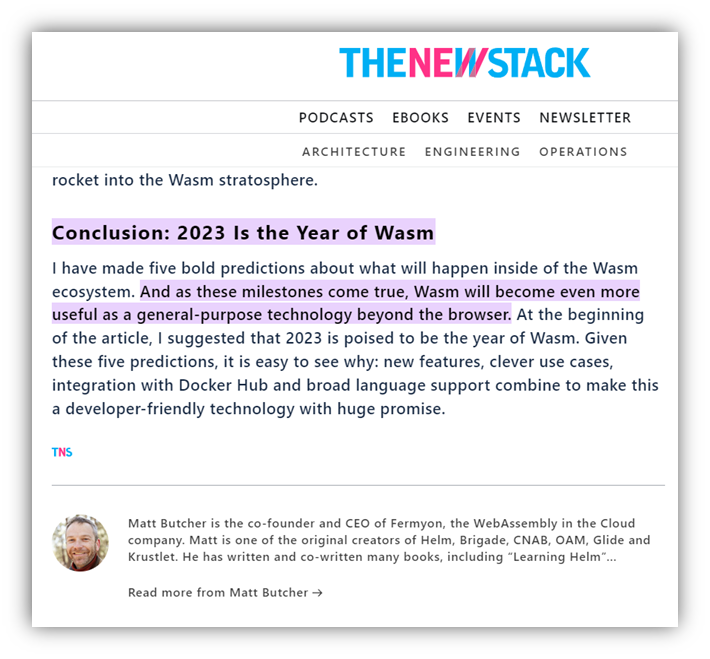


## What problems does it solve?

### Performance
write code in languages they are more familiar with (like C, C++, Rust) that are often more performant than JavaScript

### Security
uses a sandbox for code execution, keeping the code isolated from the rest of the system and minimizing the potential for security issues

### Portability
developers can use the best language for the job without worrying about whether it will run in a web context

For example, bringing container based on a particular to another architecture adds a performance (emulation)

# Loading & running in the Browser

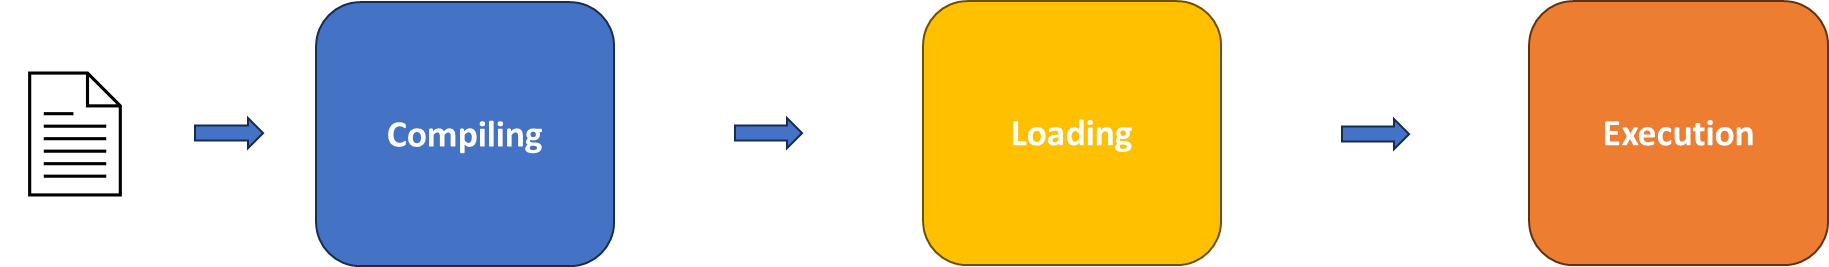

- **Compiling**: 
  - Transforms the WebAssembly code into machine code. 
  - Enables direct execution by the computer's hardware.
- **Loading**: 
  - Loads the module into the browser's memory.
  - Creates a new `WebAssembly.Instance` object (a stateful, executable instance of a `WebAssembly.Module`).
  - Initializes the `WebAssembly.Memory` and `WebAssembly.Table` objects.
- **Execution**: 
  - Invokes exported functions from JavaScript.
  - Enables computations, memory manipulation, and invocation of other WebAssembly functions.

## Simple WAT File

In [83]:
%%writefile "notebook/add.wat"

;; This is a simple module declaration that takes two numbers
;; in parameters, adds them and return the result.
(module
    ;; Input
    ;;  param i32
    ;;  param i32
    ;; Output
    ;;  result i32
    (func $add (param i32 i32) (result i32)
        local.get 0
        local.get 1
        i32.add
    )
    ;; export the function so JS can call it
     (export "add" (func $add))
)

Overwriting notebook/add.wat


## Some characteristics

WebAssembly is stack-based, it provides the following benefits:

Sure, here are a few reasons why WebAssembly is stack-based:

1. **Efficient Parsing and Validation**: parsed and validated in a single pass (control flow).

2. **Compact Code**: smaller code sizes -> best for WASM to be downloaded over the internet.

3. **Simplicity**: compiler simpler -> easier to specify, implement, reason about, and debug.


Bytecode is compiled before execution (vs during execution for JIT), 



## Stack + AOT 

WASM bytecode is compiled to machine code before execution, rather than during execution (Just-In-Time).

1. **Efficient Compilation**: Stack validation speeds up the AOT compilation process

2. **Improved Performance**: AOT compilers optimize code during compilation

3. **Startup Performance**: AOT eliminates the need for the runtime compilation done in JIT, reducing startup time

(NB. AOT compilation can also be applied to register-based systems)

### Compiling WAT to WASM
A tool exists to compile the WebAssembly Text format into a binary representation, wat2wasm

In [84]:
%%bash 
wat2wasm notebook/add.wat -o notebook/add.wasm

## Call from Browser

Once we have compile the WAT file into a WASM binary format, we can loaded from the browser using some bootstraping code.

In [85]:
%%writefile "notebook/add.js"

// access the file system and load the wasm module.
import fs from 'fs' 

// call_add_from_wasm shows how to load the WASM binary module
// and call the exported function with provided parameters.
(async function () {

    // read the wasm module form the file system.
    const wasmModule = fs.readFileSync('notebook/add.wasm'); 

    // Instantiate the buffer.
    // return a module named math and its exports
    const mod = await WebAssembly.instantiate(new Uint8Array(wasmModule))
        .then(result => result.instance.exports); 

    // Interoperability between Javascript and WASM
    // The following function acts as any other function in ES6
    console.log("Calling WASM, adding two numbers: " + mod.add(10, 5)); 

})();


Overwriting notebook/add.js


In [86]:
%%bash 
node notebook/add.js

Calling WASM, adding two numbers: 15


## Additional Tools

`wasm-objdump` is a command-line tool provided as part of the WebAssembly Binary Toolkit (WABT). It's a utility used for displaying information about a WebAssembly binary file (.wasm). The output is similar to the output from the Unix `objdump` tool.

Key features of `wasm-objdump` include:

1. **Disassembly:** translate into human-readable text format (WAT)

2. **Section Details:** info about various sections of the WebAssembly binary. 

Sections for function definitions, data, imports, exports, etc.


3. **Byte Offset:**: displays the byte offset of that item in the binary

To use `wasm-objdump`, you need to install the WABT, and then you can run it on a .wasm file like this:


In [87]:
%%bash
wasm-objdump -x notebook/add.wasm 


add.wasm:	file format wasm 0x1

Section Details:

Type[1]:
 - type[0] (i32, i32) -> i32
Function[1]:
 - func[0] sig=0 <add>
Export[1]:
 - func[0] <add> -> "add"
Code[1]:
 - func[0] size=7 <add>


`wasm-decompile` is another tool provided as part of the WebAssembly Binary Toolkit (WABT). Unlike `wasm-objdump` which disassembles a WebAssembly binary into a low-level human-readable format (WAT), `wasm-decompile` goes a step further and tries to decompile the binary into a higher-level, more readable and understandable representation.

Key features of `wasm-decompile` include:

1. **Decompilation:**: translate binary code into a high-level pseudo-code 

2. **Symbolic Names:**: uses symbolic names for functions and variables when possible (easier to understand)

3. **Control Structures:** convert to higher-level control structures such as loops and if-then-else statements


To use `wasm-decompile`, you first need to install WABT. After that, you can run it on a .wasm file like this:


In [88]:
%%bash
wasm-decompile notebook/add.wasm

export function add(a:int, b:int):int {
  return a + b
}



Here's a summary of all tools:

The WebAssembly Binary Toolkit (WABT) includes a collection of tools for working with WebAssembly:

1. **wasm-objdump**: Disassembles a WebAssembly binary file into a human-readable format (WAT).

2. **wasm-decompile**: Decompiles a WebAssembly binary into a high-level, readable pseudo-code.

3. **wat2wasm**: Converts a WebAssembly text file (WAT) into a WebAssembly binary file (WASM).

4. **wasm2wat**: Converts a WebAssembly binary file (WASM) into a WebAssembly text file (WAT).

5. **wasm-interp**: Interprets a WebAssembly binary file, optionally providing a debugging environment for stepping and breakpoints.

6. **wasm2c**: Converts a WebAssembly binary file into a C source and header file.

7. **wasm-validator**: Validates a WebAssembly binary file according to the WebAssembly specification.

8. **wasm-link**: Links multiple WebAssembly binary files together.

9. **spectest-interp**: Reads a Spectest JSON file and interprets the tests defined.

10. **wasm-opcodecnt**: Counts opcode usage for instructions.

See [WABT GitHub repository](https://github.com/WebAssembly/wabt).


# WebAssembly System Interface (WASI)

- WASI is a standardized API, providing a system interface for WebAssembly modules.
- Offers a secure, portable method for WebAssembly applications to interact with their host environment.

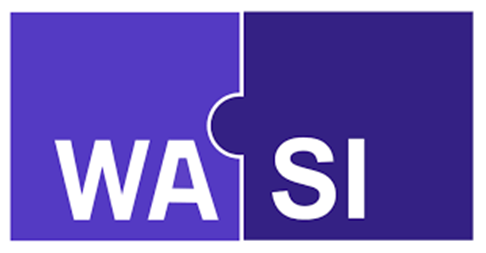

## Evolution of WebAssembly

- WebAssembly was designed initially to run within a web browser.

- Its scope expanded due to a growing interest in using it as a general-purpose runtime outside browsers.

## Features of WASI

- Standardizes system-level operations: file I/O and network access.

- Preserves sandboxed execution model

## Goal of WASI

- running WebAssembly programs on any WASI-supporting system without program modifications

- "write once, run anywhere"

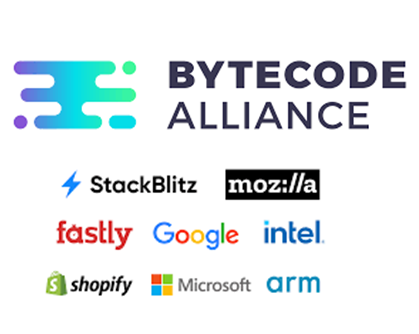

We'll be using `wasmer` to run the WASM. Wasmer is a standalone JIT WebAssembly runtime aiming to be universal. It supports WASI and Emscripten out of the box, enabling easy execution of WebAssembly binaries on various platforms.

In [89]:
%%bash
wasmer run notebook/add.wasm --invoke add 10 10 

20


## Add external function 

Let's get see how we can get external parameters

In [90]:
%%writefile "notebook/add_ext.wat"

;; This Module demonstrate the usage of an external function 
(module
    ;; This part declares that there is a dependency on an external function to
    ;; be called; either from another WASM module, or from JS.
    (func $log (import "imports" "log_func") (param i32))

    ;; Input
    ;;  param i32
    ;;  param i32
    ;; Output
    ;;  result i32
    (func $add (param i32 i32) (result i32)
        local.get 0
        local.get 1
        i32.add
    )

    (func $add_and_log (param i32 i32)
        local.get 0
        local.get 1
        call $add 
        call $log
    )

    ;; export the function so JS can call it
     (export "add" (func $add))
     (export "add_log" (func $add_and_log))

)


Overwriting notebook/add_ext.wat


In [91]:
%%bash 
wat2wasm notebook/add_ext.wat -o notebook/add_ext.wasm

Then we would need to define the JS 

In [92]:
%%writefile "notebook/add_ext.js"

// access the file system and load the wasm module.
import fs from 'fs' 

// call_add_from_wasm shows how to load the WASM binary module
// and call the exported function with provided parameters.
(async function () {

    // read the wasm module form the file system.
    const wasmModule = fs.readFileSync('notebook/add_ext.wasm'); 

    // This part is new, we define the import function to be 
    // called internally by the WASM
    var importObject = {
        imports: {
            log_func: function(arg) {
                console.log("Result: " + arg);
            }
        }
    };

    // Instantiate the buffer.
    // return a module named math and its exports
    await WebAssembly.instantiate(new Uint8Array(wasmModule), importObject)
        .then(result => result.instance.exports.add_log(10, 5)); 

}) ();


Overwriting notebook/add_ext.js


In [93]:
%%bash 
node notebook/add_ext.js

Result: 15


## Memory

We can share a linear memory model between our JS and WASM

In [94]:
%%writefile "./notebook/memory.wat"

;; This Module demonstrate the usage of an external function 
(module
    ;; This part declares that there is a dependency on an external function to
    ;; be called; either from another WASM module, or from JS.
    (func $log (import "imports" "log_func") (param i32))

    ;; Imports an external Memory initiated by JS
    ;; creates a memory object with a size of 1 page (64KiB)
    (memory (import "env" "memory") 1)

    ;; Input
    ;;  param i32
    ;;  param i32
    ;; Output
    ;;  result i32
    (func $add (param i32 i32) (result i32)
        local.get 0
        local.get 1
        i32.add
    )

    (func $add_and_log (param $max i32) (param $n1 i32) (param $n2 i32)
        ;; Loop index
        (local $i i32)
        (local $maxPtr i32)

        (local.set $i (i32.const 0))  

        ;; initiatize at the max offset
        (local.set $maxPtr 
            (i32.mul (local.get $max) (i32.const 4))
        )
    
        (loop $loop 
            local.get $n1
            local.get $n2
            call $add
            (i32.load (local.get $i))
            i32.mul
            call $log

            ;; Increment $i
            (local.set $i
                (i32.add (local.get $i) (i32.const 4))
            )
            ;; i < max
            local.get $i
            local.get $maxPtr
            i32.lt_s
            br_if $loop
        )
    )

    ;; export the function so JS can call it
    (export "add_and_log" (func $add_and_log))

)

Overwriting ./notebook/memory.wat


In [95]:
%%bash
wat2wasm notebook/memory.wat -o notebook/memory.wasm

In [96]:
%%writefile "./notebook/memory.js"

// access the file system and load the wasm module.
import fs from 'fs' 

// call_add_from_wasm shows how to load the WASM binary module
// and call the exported function with provided parameters.
(async function () {

    // read the wasm module form the file system.
    const wasmModule = fs.readFileSync('notebook/memory.wasm'); 

    // This part is new, we define the import function to be 
    // called internally by the WASM
    var importObject = {
        imports: {
            log_func: function(arg) {
                console.log("We are trigger this function internally, here is the result: " + arg);
            },
        },
        env: {
            // initiatize the memory block to be passed to WASM
            memory: new WebAssembly.Memory({initial: 10, maximum: 100 })
        }
    };

    // Instantiate the buffer.
    // return a module named math and its exports
    await WebAssembly.instantiate(new Uint8Array(wasmModule), importObject)
        .then(result => {
            
            // We initiatize the array with values
            const maxNumber = 10;
            const arr = new Int32Array(importObject.env.memory.buffer);

            for (let i = 0; i < maxNumber; i++) {
                arr[i] = i * 10;
            }           

            // We call the WASM function to process the data
            result.instance.exports.add_and_log(maxNumber, 1, 2)
        }); 

})();

Overwriting ./notebook/memory.js


In [97]:
%%bash 
node notebook/memory.js

We are trigger this function internally, here is the result: 0
We are trigger this function internally, here is the result: 30
We are trigger this function internally, here is the result: 60
We are trigger this function internally, here is the result: 90
We are trigger this function internally, here is the result: 120
We are trigger this function internally, here is the result: 150
We are trigger this function internally, here is the result: 180
We are trigger this function internally, here is the result: 210
We are trigger this function internally, here is the result: 240
We are trigger this function internally, here is the result: 270


# Higher language Support

WASM MVP was designed to support non-GC (deterministic, unmanaged) languages, such as 

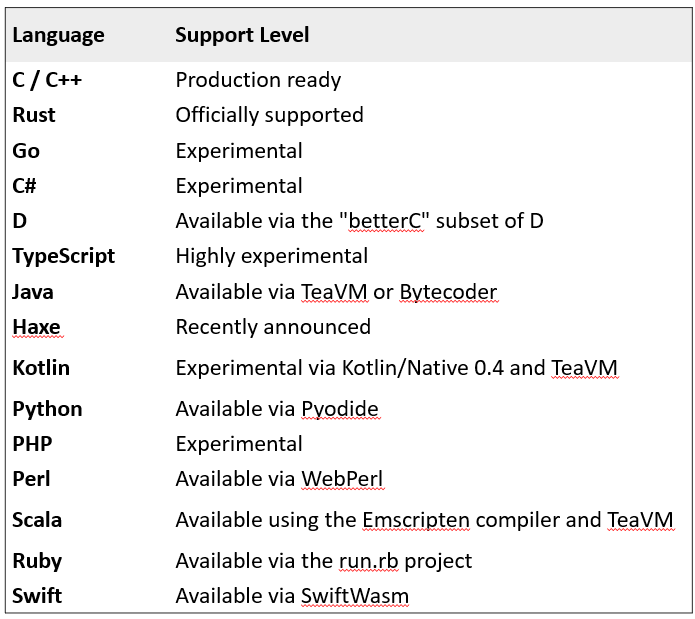

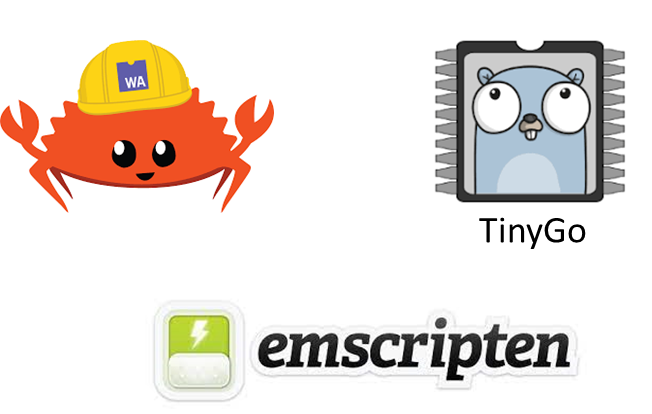

We will show 3 examples, using C and Rust



### Using C to compile to WASM

With Emscripten:

- compiler toolchain that can convert C, C++ (and other languages using LLVM) into highly-optimizable WebAssembly 

- LLVM, Clang, and Binaryen


#### Components:

- Emscripten Compiler (emcc/em++): These are the main compiler drivers. They serve as drop-in replacements for gcc/g++. These tools drive the compilation process which involves multiple stages: preprocessing, compiling to LLVM bitcode, converting to JavaScript or WebAssembly.

- Emscripten SDK (emsdk): The Emscripten SDK is the complete toolchain for compiling and running code. It includes the necessary tools (LLVM, Clang, Binaryen, Node.js, Python, Java) and libraries.

- WebIDL Binder (webidl_binder.py): This tool allows you to automatically bind C++ to JavaScript (and vice versa) using WebIDL interface descriptions. It generates glue code for marshaling data between the two languages.



In [98]:
%%writefile "notebook/hello_world.c"

// Include the standard I/O library for printing to the console.
#include <stdio.h>
// Include the Emscripten library for WebAssembly-specific functions.
#include <emscripten.h>

// When compiling C++ code, functions have to be declared as 'extern "C"' in order to 
// avoid name mangling and ensure that the functions can be called from JavaScript.
// If we are compiling C code, this is not necessary.
#ifdef __cplusplus
#define EXTERN extern "C"
#else
#define EXTERN
#endif

// The main function is the entry point for C and C++ programs.
// For WebAssembly modules, it is called once when the module is loaded.
// In this case, it doesn't do anything.
int main() {
    return 0;
}

// 'EXTERN' will either be 'extern "C"' (for C++) or empty (for C).
// 'EMSCRIPTEN_KEEPALIVE' is an Emscripten directive that prevents the function from 
// being eliminated during dead code elimination. It's needed for functions that 
// are called from JavaScript.
EXTERN EMSCRIPTEN_KEEPALIVE void custom_function() {
    // Print a message to the console. This will actually be output to the browser's console.
    printf("This function is triggered from C!\n");
}


Overwriting notebook/hello_world.c


You can compile the C code to WebAssembly using the Emscripten compiler with the following command:

In [99]:
%%bash
emcc notebook/hello_world.c -o notebook/hello_world.wasm 

In [100]:
%%bash 
wasmer run notebook/hello_world.wasm --invoke custom_function

This function is triggered from C!



## More Advanced C code

The next example compiles the code with SDL. 

SDL, which stands for Simple DirectMedia Layer, is a cross-platform development library designed to provide low level access to audio, keyboard, mouse, joystick, and graphics hardware via OpenGL and Direct3D. It is used by video playback software, emulators, and popular games, including Valve's catalog and many Humble Bundle games.

In [101]:
%%writefile "notebook/sdl.c"

// Import necessary libraries
#include <stdbool.h>
#include <SDL2/SDL.h>
#include <SDL2/SDL_image.h>
#include <emscripten.h>

/**
This header file provides a collection of functions, macros, and variables that help developers interface 
with Web APIs and manage the life cycle of the WebAssembly application.

One of the key features provided by emscripten.h is the ability to set the main loop for the program, 
which is necessary for creating interactive applications such as games or graphical applications.
**/

// Define the dimensions of the window
#define WINDOW_WIDTH    640
#define WINDOW_HEIGHT   480

// Define the size of the sprite
const unsigned int size = 64;

// Initialize SDL window and renderer
SDL_Window *window = NULL;
SDL_Renderer *renderer = NULL;

// Initialize the velocity of the sprite and its size
SDL_Point velocity = {0, 0};
SDL_Rect sprite = {0, 0, size, size};
SDL_Texture *texture = NULL;

// Function to initialize SDL and create window and renderer
bool init() {
     if (SDL_Init(SDL_INIT_VIDEO) < 0) {
        return false;
    }

    SDL_CreateWindowAndRenderer(WINDOW_WIDTH, WINDOW_HEIGHT, 0, &window, &renderer);
    if (window == NULL | renderer == NULL) {
        return false;
    }

    return true;
}

// Function to load textures
void load_textures() {
    SDL_Surface *surface = IMG_Load("assets/texture.png");
    if (!surface) {
        printf("%s\n", IMG_GetError());
    }
    SDL_SetColorKey(surface, SDL_TRUE, SDL_MapRGB(surface->format, 0x75, 0xFF, 0xFF));
    texture = SDL_CreateTextureFromSurface(renderer, surface);
    SDL_FreeSurface(surface);
}

// Function to process events like key press
void process_event(SDL_Event *event) {
    SDL_Keycode key = event->key.keysym.sym;

    if (event->key.type == SDL_KEYDOWN) {
        if (key == SDLK_LEFT || key == SDLK_RIGHT) {
            velocity.x = key == SDLK_LEFT ? -1 : 1;
        }
        if (key == SDLK_UP || key == SDLK_DOWN) {
            velocity.y = key == SDLK_UP ? -1 : 1;
        }
    }
    if (event->key.type == SDL_KEYUP) {
        velocity.x = 0;
        velocity.y = 0;
    }
}

// Function to process input from the user
void process_input() {
    SDL_Event event;

    while (SDL_PollEvent(&event)) {
        process_event(&event);
    }
}

// Function to update the sprite position
void update() {
    sprite.x += velocity.x;
    sprite.y += velocity.y;
}

// Function to draw the sprite on the renderer
void draw() {
    SDL_RenderCopy(renderer, texture, NULL, &sprite);
}

// Main game loop
void main_loop() {
    process_input();

    SDL_SetRenderDrawColor(renderer, 0, 0, 0, 255);
    SDL_RenderClear(renderer);

    update();
    draw();

    SDL_RenderPresent(renderer);
}

// Function to destroy the window and quit SDL
void destroy() {
    SDL_DestroyRenderer(renderer);
    SDL_DestroyWindow(window);
    SDL_Quit();
}

// Main function
int main() {
    // Initialize SDL and load textures
    init();
    load_textures();

    // Center the sprite in the window
    sprite.x = (WINDOW_WIDTH - size) / 2;
    sprite.y = (WINDOW_HEIGHT - size) / 2;

    // Set the main loop and start the game
    // allows you to set a function that Emscripten should call repeatedly, 
    // creating a game or application loop. 
    // This is used to keep the application running and 
    // responding to user input.

    emscripten_set_main_loop(main_loop, -1, 1);

    // Destroy the window and quit SDL when the game is finished
    destroy();
    return EXIT_SUCCESS;
}


Overwriting notebook/sdl.c


In [102]:
%%bash 
emcc notebook/sdl.c -s WASM=1 -s USE_SDL=2 -s USE_SDL_IMAGE=2 -s SDL2_IMAGE_FORMATS='["png"]' --preload-file notebook/assets -o notebook/index.js

You could use a simple python web server to load the 'game' - please note that the image differs from the code above.
```bash
python -m http.server 8111 
```

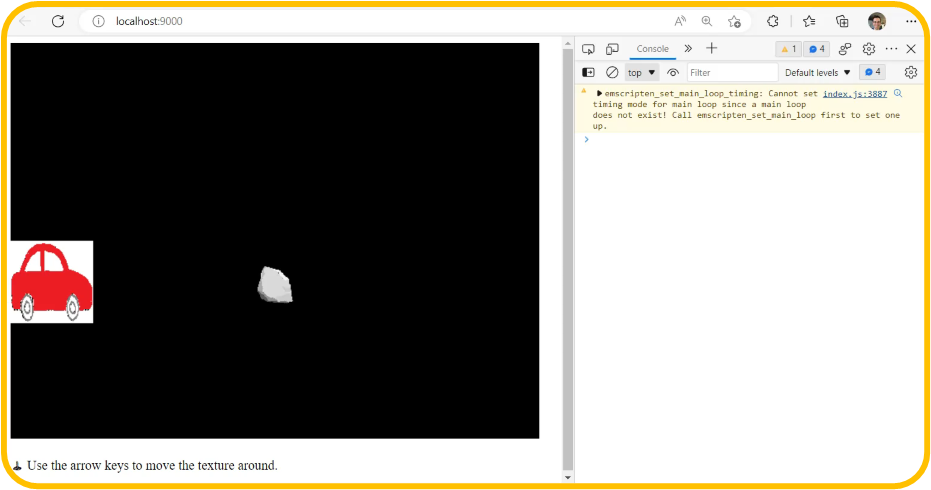

## Example in Rust

Why using Rust for WASM

- **Safety**: Rust prioritizes memory safety without compromising performance, reducing the likelihood of memory management-related bugs or vulnerabilities.

- **Performance**: As a systems programming language, Rust offers low-level access to system resources and compiles to WASM efficiently.<br />

- **Interoperability**: Rust's robust WASM support simplifies the integration of Rust-generated WASM modules into JavaScript applications.<br />

- **Modern Language Features**: Rust includes contemporary features such as pattern matching, type inference, and concurrency primitives.<br />

- **Tooling**: With tools like `wasm-bindgen` and `wasm-pack`, Rust streamlines WASM binding generation, WASM package creation, and WASM binary optimization.<br />

- **Active Community**: Rust boasts a dynamic community that continuously enhances its WASM support, and provides excellent documentation including a WASM-specific book.<br />

In [103]:
%%writefile "notebook/montecarlo/src/lib.rs"

// Import the necessary libraries
extern crate rand;
extern crate rand_distr;

// Import the Distribution and Normal traits for generating random numbers. 
// Normal is used because stock returns are often assumed to follow a normal (or log-normal) 
// distribution due to Central Limit Theorem.
use rand_distr::{Distribution, Normal}; 
use std::time::{Instant}; // Import the Instant struct for timing

// The compute_risk function is defined as an externally accessible function
#[no_mangle] // no_mangle: don't let the compiler generate a function name so it can be called externally
pub extern "C" fn compute_risk() {
    // Create a new portfolio object
    let mut portfolio = Portfolio::new();
    
    // Add stocks to the portfolio with their expected returns and standard deviations. 
    // Expected return is the mean of the distribution of possible returns, usually 
    // estimated based on historical data or predicted through financial models. 
    // Standard deviation measures the dispersion of returns around the mean, acting as a measure of risk.
    portfolio.add_stock(5.0, 0.02); 
    portfolio.add_stock(8.5, 0.035);
    portfolio.add_stock(3.2, 0.1);
  
    // Start a timer to track the execution time of the simulation
    let start = Instant::now();
    
    // Run a Monte Carlo simulation on the portfolio with 1000 iterations. 
    // Monte Carlo simulation is a method to estimate the risk of a portfolio 
    // through repeated random sampling.
    let (expected_return, risk) = portfolio.simulate(1000); 

    // Calculate the duration of the simulation
    let duration = start.elapsed();

    // Output the expected return, risk and execution time of the simulation
    println!("Expected returns: {}, Risk: {}, Exec time: {:?}", expected_return, risk, duration);
}

// Define a Stock struct that holds the expected 
// return and standard deviation of a stock
struct Stock {
    expected_return: f64,
    standard_deviation: f64,
}

// Define a Portfolio struct that holds a vector of Stocks
struct Portfolio {
    stocks: Vec<Stock>,
}

// Implement methods on the Portfolio struct
impl Portfolio {
    // Create a new, empty portfolio
    fn new() -> Portfolio {
        Portfolio { stocks: Vec::new() }
    }

    // Add a stock to the portfolio with a given 
    // expected return and standard deviation
    fn add_stock(&mut self, expected_return: f64, standard_deviation: f64) {
        self.stocks.push(Stock {
            expected_return,
            standard_deviation,
        });
    }

     // Run a Monte Carlo simulation on the portfolio with a specified number of iterations.
     // See this reference: https://towardsdatascience.com/best-investment-portfolio-via-monte-carlo-simulation-in-python-53286f3fe93
    fn simulate(&self, iterations: usize) -> (f64, f64) {
        let mut rng = rand::thread_rng(); // Create a random number generator
        let mut returns = Vec::with_capacity(iterations); // Pre-allocate a vector to hold the returns
        
        // For each iteration, calculate the return of the portfolio
        for _ in 0..iterations {
            let mut portfolio_return = 0.0;
            for stock in &self.stocks {
                
                // Build a Normal distribution from mean and standard deviation
                // here, from return and risk
                let normal = Normal::new(stock.expected_return, stock.standard_deviation).unwrap();
                
                // We are randomly selecting a value from the normal distribution
                portfolio_return += normal.sample(&mut rng); 
            }
            returns.push(portfolio_return);
        }
        // Portfolio expected returned = mean of the returns
        let mean: f64 = returns.iter().sum::<f64>() / iterations as f64;

        // To simplify the calculation of Risk, we are using the Standard Deviation
        let variance: f64 = returns.iter().map(|&x| (x - mean).powi(2)).sum::<f64>() / iterations as f64;
        (mean, variance.sqrt()) // Return the mean (expected return) and standard deviation (risk)
    }
}



Overwriting notebook/montecarlo/src/lib.rs


In [104]:
%%bash 
cd notebook/montecarlo
cargo wasi build

   Compiling montecarlo v0.1.0 (/Users/JEROME.SCHMALTZ@BNC.CA/Code/wasm-demo/notebook/montecarlo)
    Finished dev [unoptimized + debuginfo] target(s) in 0.56s


Calling the Rust function, from WASI

In [105]:
%%bash 
wasmer notebook/montecarlo/target/wasm32-wasi/debug/montecarlo.wasm --invoke compute_risk

Expected returns: 16.700981658599822, Risk: 0.10466738167373754, Exec time: 2.923ms



## Golang

Using the Wasmtime library

1. **Wasmtime Runtime**: `wasmtime-go` provides an API to run WebAssembly modules in a secure, efficient and sandboxed way

2. **WASI and More**: supports WASI (interact with the system)

3. **Go Integration**: high-level, idiomatic Go API


In [106]:
%%writefile "notebook/gowasm/main.go"

package main

import (
	"fmt"
	"io"
	"os"
	"github.com/bytecodealliance/wasmtime-go"
)

func main() {

	engine := wasmtime.NewEngine()

	// Create a new store with the engine
	store := wasmtime.NewStore(engine)

	// Read the WASM module file
	moduleFile, err := os.Open("../add.wasm")
	if err != nil {
		panic(err)
	}
	defer moduleFile.Close()

	moduleBytes, err := io.ReadAll(moduleFile)
	if err != nil {
		panic(err)
	}

	// Compile the module
	module, err := wasmtime.NewModule(engine, moduleBytes)
	if err != nil {
		panic(fmt.Sprintf("cannot load the module, %s", err.Error()))
	}

	instance, err := wasmtime.NewInstance(store, module, []wasmtime.AsExtern{})
	if err != nil {
		panic(fmt.Sprintf("cannot create instance, %s", err.Error()))
	}

	add := instance.GetExport(store, "add").Func()

	val, err := add.Call(store, 6, 27)
	if err != nil {
		panic(fmt.Sprintf("cannot call function, %s", err.Error()))
	}


	fmt.Printf("Calling function from WASM module: add(6, 27) = %d\n", val.(int32))
}



Overwriting notebook/gowasm/main.go


In [107]:
%%bash
cd notebook/gowasm && go run main.go

Calling function from WASM module: add(6, 27) = 33


## Benchmarking

- **Execution Speed**: WebAssembly often executes faster than JavaScript as it's closer to machine code, allowing for more optimization. The difference is greater for computationally heavy tasks.

- **Startup Time**: WebAssembly can have faster startup time due to more efficient parsing of its binary format compared to JavaScript's text format.

- **Consistent Performance**: WebAssembly provides more predictable performance by avoiding JavaScript's dynamic type checking and garbage collection pauses.

- **JavaScript JIT Optimization**: Modern JavaScript engines use JIT compilers that can optimize frequently used code, potentially matching WebAssembly performance in some cases.

Here's the corresponding code to create the Fibonacci sequence using WAT

In [108]:
%%writefile "notebook/fib_2.wat"

(module
 ;; The module exports the fib function
 (export "fib" (func $fib)) 

 ;; Function definition of 'fib'
 ;; It takes a 32-bit integer as a parameter and returns a 32-bit integer result
 (func $fib (param $n i32) (result i32)
 
  ;; 'if' statement checks if the parameter $n is less than 2
  (if
   (i32.lt_s
    (local.get $n)  ;; get the value of local variable $n
    (i32.const 2)  ;; compare with constant integer 2
   )
   ;; If $n is less than 2, the function returns 1
   (return
    (i32.const 1)  ;; return constant integer 1
   )
  )
  ;; If $n is not less than 2, the function returns the sum of fib(n-2) and fib(n-1)
  (return
   (i32.add  ;; add the following two function calls
    ;; First recursive call: fib(n-2)
    (call $fib  ;; call function $fib with argument (n-2)
     (i32.sub  ;; subtract 2 from $n
      (local.get $n)  ;; get the value of local variable $n
      (i32.const 2)  ;; subtract constant integer 2
     )
    )
    ;; Second recursive call: fib(n-1)
    (call $fib  ;; call function $fib with argument (n-1)
     (i32.sub  ;; subtract 1 from $n
      (local.get $n)  ;; get the value of local variable $n
      (i32.const 1)  ;; subtract constant integer 1
     )
    )
   )
  )
 )
)



Overwriting notebook/fib_2.wat


In [109]:
%%bash
wat2wasm notebook/fib_2.wat -o notebook/fib_2.wasm

Here, we are creating the bootstrapping code to load the WASM file, and establish a Performance observer to collect the data

In [110]:
%%writefile "notebook/benchmark.js"

// Import necessary modules from Node.js
import fs, { writeFile } from 'fs'
import util from 'util'
import path from 'path'
import { PerformanceObserver, performance } from 'perf_hooks';

// Promisify fs.readFile and fs.writeFile for easier use with async/await
const readFile = util.promisify(fs.readFile)
const writeFileAsync = util.promisify(writeFile)

// Define the main async function
async function main () {
  // Read the WebAssembly binary file
  const buf = await readFile(path.resolve('notebook/fib_2.wasm'))

  // Instantiate the WebAssembly module
  const res = await WebAssembly.instantiate(new Uint8Array(buf.buffer))

  // Extract the 'fib' function exported from the module
  const { fib } = res.instance.exports

  // Prepare an array of results, starting with the CSV headers
  const results = [['Fibonacci Number', 'WASM Time', 'JS Time']]

  // Run benchmarks on both the WebAssembly and JavaScript versions of the Fibonacci function
  for (let i = 1; i < 10; i++) {
    // Use Promise.all to run the benchmarks in parallel and wait for both to finish
    const [wasmTime, jsTime] = await Promise.all([
      bench('WASM', fib, i),
      bench('JS', fibonacci, i)
    ])

    // Add the benchmark results to the results array
    results.push([i, wasmTime, jsTime])
  }

  // Convert the results array to a CSV string
  const csvString = results.map(row => row.join(',')).join('\n')

  // Write the CSV string to a file
  await writeFileAsync('notebook/benchmark_results.csv', csvString)
}

// Benchmarking function
async function bench (label, fn, ubound) {
  
  const N_ITERS = 10; // Number of iterations for averaging results
  const observations = [] // Array to store performance observation entries

  // Instantiate the PerformanceObserver
  const obs = new PerformanceObserver(list => {
    const entries = list.getEntries()
    observations.push(...entries)
    performance.clearMarks() // Clear marks after getting entries
  })

  // Start observing 'measure' entries
  obs.observe({ entryTypes: ['measure'] })

  // Run the function N_ITERS times and measure the performance
  for (let i = 0; i <= N_ITERS; ++i) {
    performance.mark('Start') // Start performance mark
    fn(ubound)
    performance.mark('End') // End performance mark
    performance.measure('Start to End', 'Start', 'End') // Measure duration between 'Start' and 'End' marks
  }
 
  // Calculate average duration and return it
  const o = obs.takeRecords();
  const total = o.reduce((total, e) => total + e.duration, 0)
  const avg = total / o.length;
  return avg.toFixed(4)
}

// Recursive Fibonacci function in JavaScript
function fibonacci (num) {
  if (num <= 1) return 1

  return fibonacci(num - 1) + fibonacci(num - 2)
}

// Call the main function
main()


Overwriting notebook/benchmark.js


In [111]:
%%bash 
node notebook/benchmark.js

### Benchmark Results

In [112]:
import plotly.graph_objects as go
import pandas as pd

# Read the data from a CSV file
df = pd.read_csv('./notebook/benchmark_final.csv', sep='\t')

# Calculate the difference in percentage
df['Difference (%)'] = ((df['JS (ms)'] - df['WASM (ms)']) / df['WASM (ms)']) * 100

# Exclude outliers
q95 = df['Difference (%)'].quantile(0.95)
df = df[df['Difference (%)'] <= q95]


# Create a trace for WASM
trace_wasm = go.Scatter(
    x = df['Fibonacci'],
    y = df['WASM (ms)'],
    mode = 'lines',
    name = 'WASM'
)

# Create a trace for JavaScript
trace_js = go.Scatter(
    x = df['Fibonacci'],
    y = df['JS (ms)'],
    mode = 'lines',
    name = 'JavaScript'
)

# Define the layout
layout = go.Layout(
    title = 'Execution Time of Fibonacci Calculation in WASM vs JavaScript',
    xaxis = dict(title = 'Fibonacci Number'),
    yaxis = dict(title = 'Execution Time (ms)', type='log'),
)

# Create the figure and add the traces
fig = go.Figure(data=[trace_wasm, trace_js], layout=layout)

# Display the figure
fig.show()

In [113]:
# Calculate and print the average of the 'Difference (%)' column
average_difference = df['Difference (%)'].mean()
average_difference = round(average_difference, 2)  # Round to 2 decimal places

print('The average difference is:', str(average_difference) + '%')

The average difference is: 32.88%


**Few keypoints to note**

- For smaller Fibonacci numbers (5-10), 
JavaScript tends to outperform WebAssembly, sometimes significantly. 

This could be due to the overhead of compiling and initializing WebAssembly modules, which can be more significant for small computational tasks.
For example, at Fibonacci number 5, JavaScript is about 124% faster than WebAssembly.

- For larger Fibonacci numbers (11 and beyond), WebAssembly generally outperforms JavaScript. 
The difference in performance becomes more pronounced as the Fibonacci numbers increase. 
For example, at Fibonacci number 51, WebAssembly is about 43.58% faster than JavaScript.

- There's some fluctuation in the performance advantage of WASM over JS for certain Fibonacci numbers. For instance, at Fibonacci number 11, 12, and 13, JS seems to be faster again. 
This could be due to other factors such as the specific algorithm used, the machine it's run on, or the browser environment.

- After Fibonacci number 13, WASM consistently outperforms JS, and the performance gap grows as the Fibonacci numbers increase. 
This suggests that for computationally intensive tasks or for larger datasets, WebAssembly may provide a performance advantage over JavaScript.



# WASM in the Wild

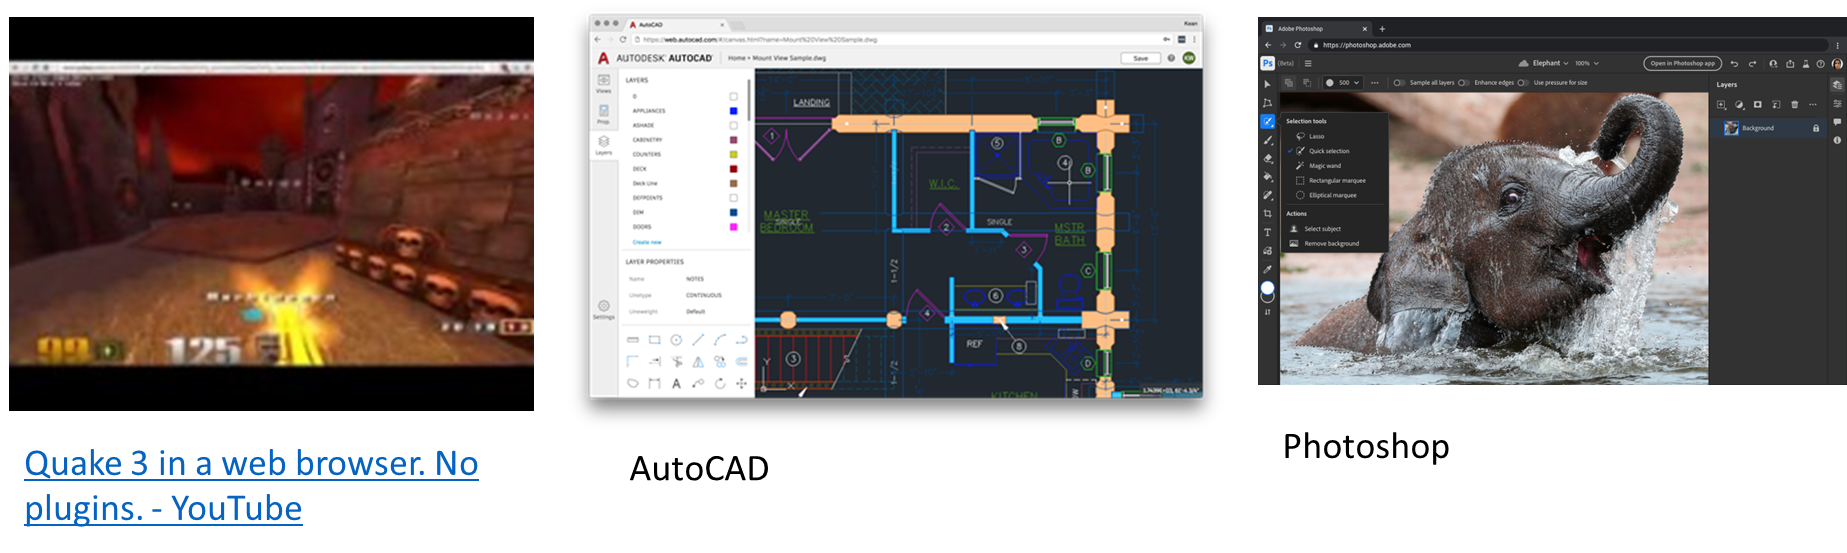

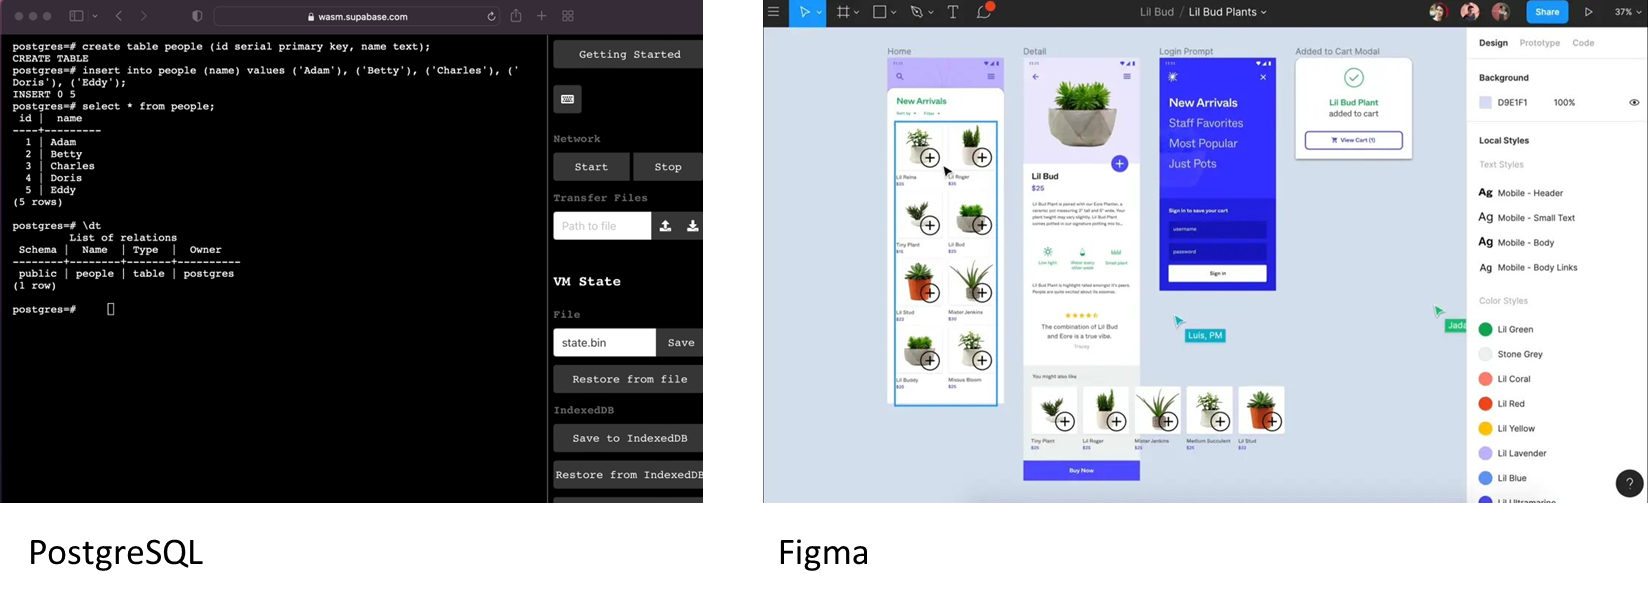

# Future of WASM

**Component Model**

Difficult to interoperate across runtime or language boundaries (non-fundamental data types like strings or structures)

Effort to define a "process model" for how WASM processes are started and how they interact with each other. 

WIT (WebAssembly Interface), an experimental textual format used for defining Wasm interfaces. 




**SIMD Support**

SIMD (Single Instruction, Multiple Data) in WASM enables parallel processing, boosting computational speed for data-intensive tasks like graphics and machine learning.

Tool support: https://emscripten.org/docs/porting/simd.html

SIMD instructions and multi-threading resulted in 10x speed improvement on the TensorFlow WebAssembly backend

In [114]:
%%writefile "notebook/filter.c"

// Import standard and emscripten libraries
#include <stdlib.h>
#include <emmintrin.h> // For SSE2 intrinsics (SIMD)
#include <time.h>
#include <emscripten/emscripten.h>
#include <stdio.h>

// Allow the code to be callable from either C or C++
#ifdef __cplusplus
#define EXTERN extern "C"
#else
#define EXTERN
#endif

// Blurs an image by averaging each pixel with its surrounding pixels
void blur(int width, int height, float* input, float* output) {
    // Defines the blur kernel
    __m128 kernel = _mm_set1_ps(1.0f / 9.0f);
    
    // Iterate over the image, skipping the edges
    for (int y = 1; y < height - 1; y++) {
        for (int x = 1; x < width - 1; x++) {
            __m128 sum = _mm_setzero_ps();
            
            // Iterate over the kernel's dimensions
            for (int ky = -1; ky <= 1; ky++) {
                for (int kx = -1; kx <= 1; kx++) {
                    // Multiply each surrounding pixel by the kernel and add to the sum
                    __m128 pixel = _mm_set1_ps(input[(y+ky)*width + (x+kx)]);
                    sum = _mm_add_ps(sum, _mm_mul_ps(pixel, kernel));
                }
            }
            
            // Write the blurred pixel to the output image
            output[y*width + x] = _mm_cvtss_f32(sum);
        }
    }
}

// Emscripten exported function to run the blur effect
EXTERN EMSCRIPTEN_KEEPALIVE void call_blur() {
    // Defines the dimensions of the image
    int width = 5*128;
    int height = 5*128;
    
    // Allocate memory for the input and output images
    float* input = (float*)malloc(width * height * sizeof(float));
    float* output = (float*)malloc(width * height * sizeof(float));

    // Fill the input image with random grayscale values
    srand(time(NULL)); // Seed the random number generator
    for (int i = 0; i < width * height; i++) {
        input[i] = (float)rand() / (float)RAND_MAX; // Generate a random float between 0.0 and 1.0
    }

    printf("Blurring\n");

    // Call the blur function
    blur(width, height, input, output);

    printf("Done!\n");
    
    // Clean up the allocated memory
    free(input);
    free(output);
}

// Main function to call the blur function
int main() {
    
    call_blur();
    return 0;
}


Overwriting notebook/filter.c


In [115]:
%%bash
emcc -O3 -s WASM=1 -s -msse2 -msimd128 -s EXPORTED_FUNCTIONS=_call_blur notebook/filter.c -o notebook/filter.wasm


In [116]:
%%bash 
wasmer run notebook/filter.wasm -i call_blur

Blurring
Done!



## WASM GC

Garbage Collection (WASM GC) automates memory management, improving integration with JavaScript and host languages. It simplifies compiling high-level languages to WASM, reducing manual memory handling and runtime overhead.

![image.png](attachment:image.png)

https://kotlinlang.org/docs/wasm-get-started.html


Roadmap
https://webassembly.org/roadmap/



## Memory Model Improvement

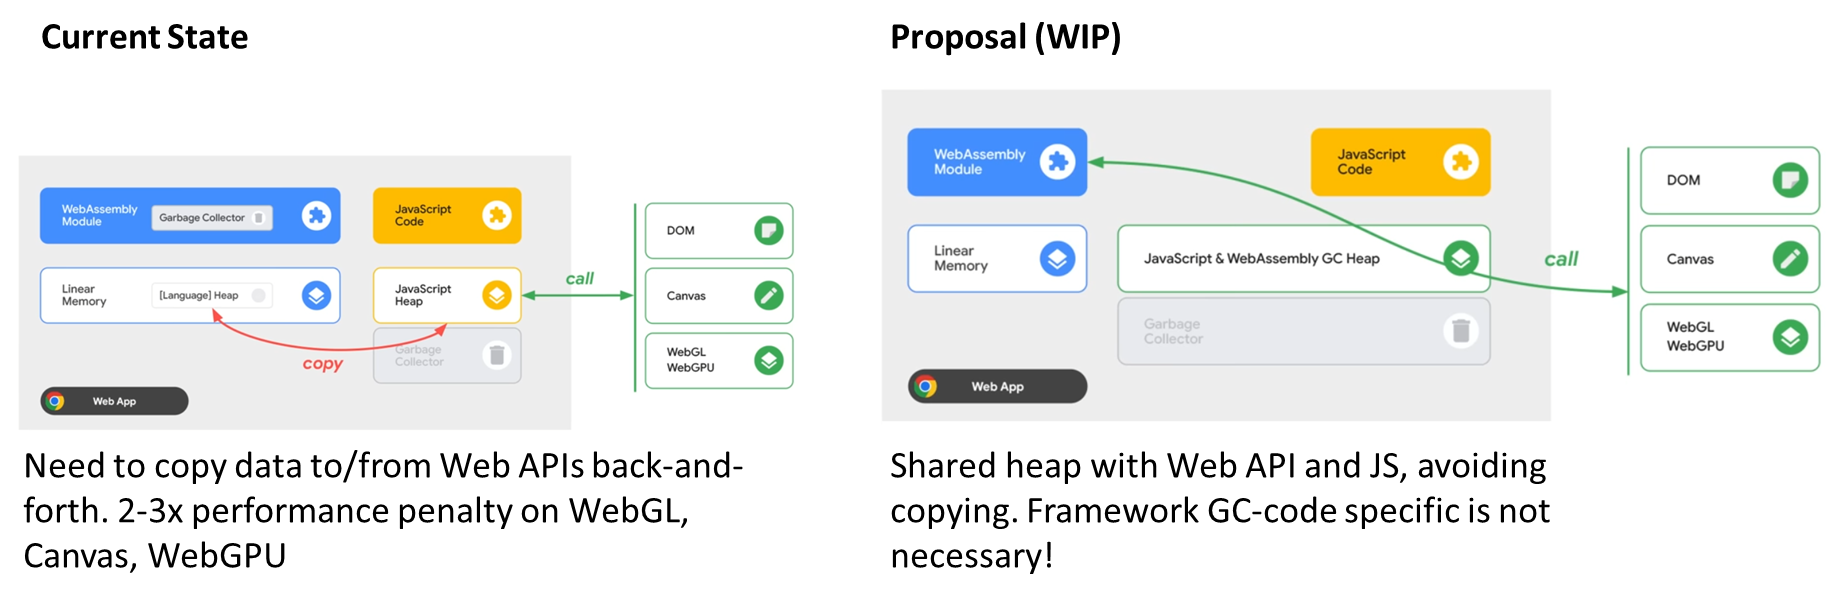

https://www.youtube.com/watch?v=RcHER-3gFXI

## Improvements & Example with .NET

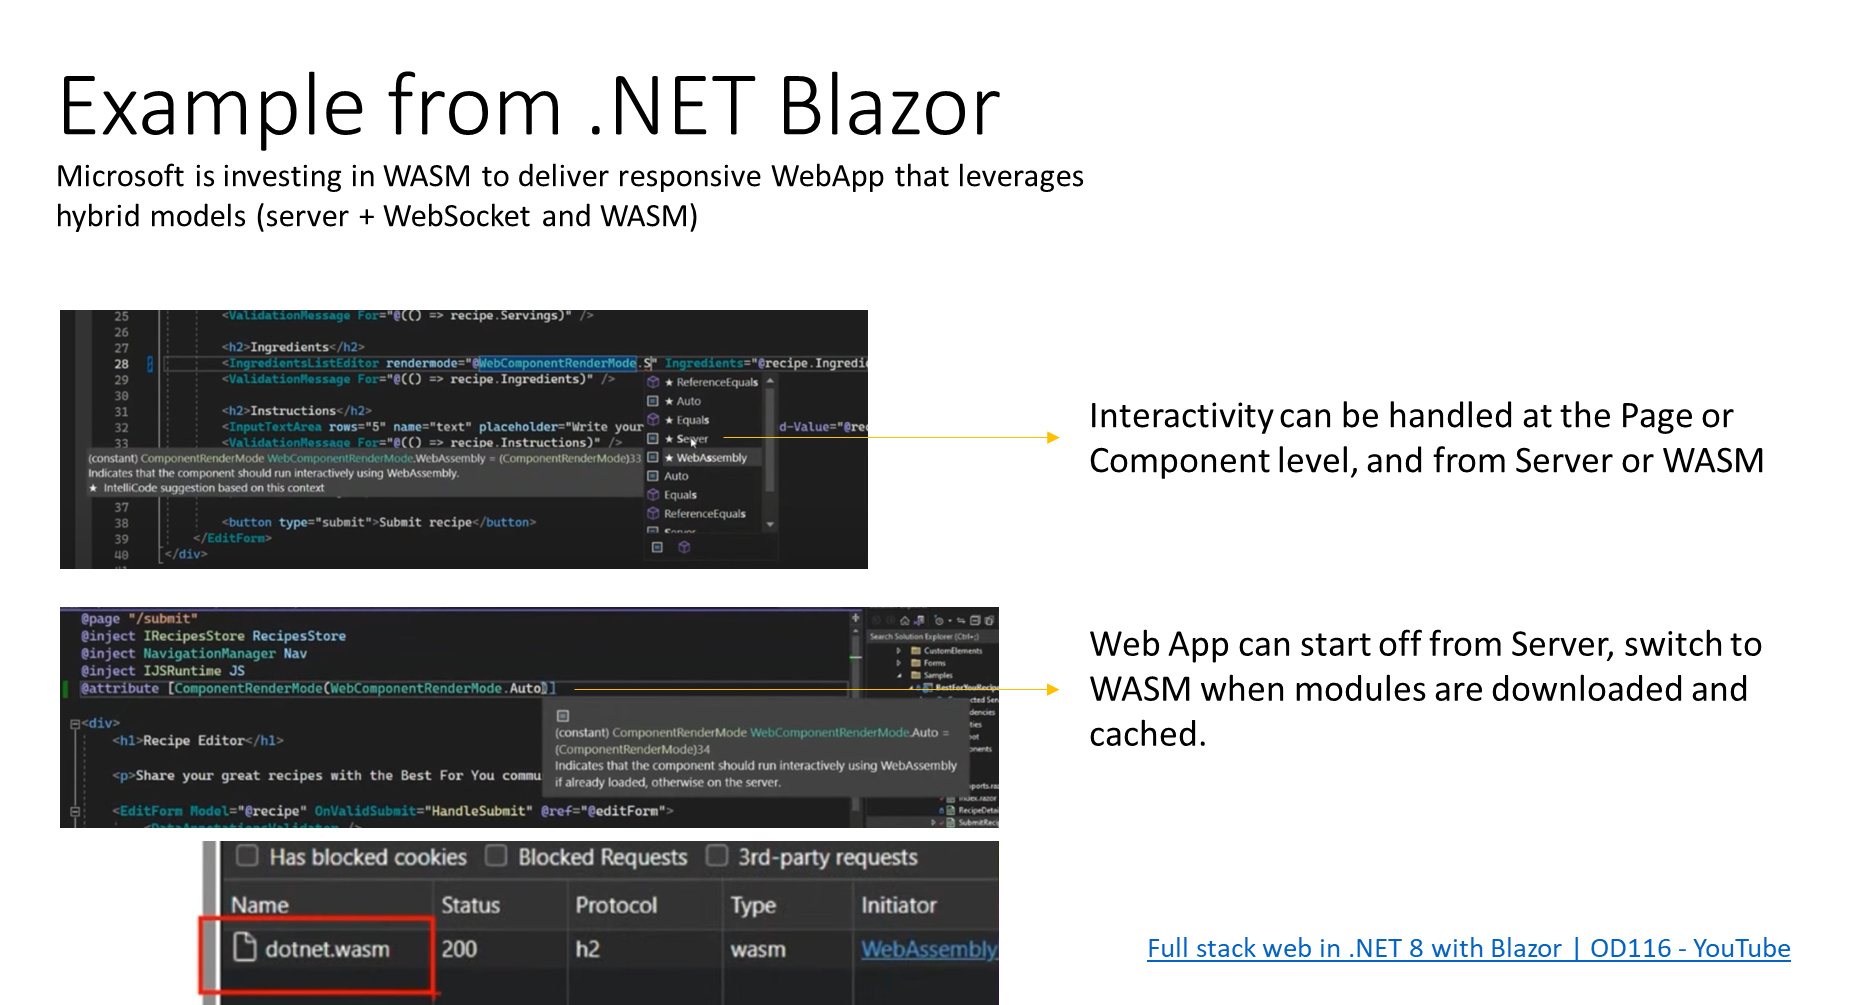

# Deploy WASM on the Edge

We will be deploying WASM module on Cloudflare.

1. **Content Delivery Network**: Cloudflare operates a large content delivery network (CDN) which accelerates website load times by caching content closer to users.

2. **Web Security**: Offers protection against DDoS attacks, hacking, and other cyber threats.

3. **Edge Computing**: Through Cloudflare Workers, it allows running JavaScript and WASM at the edge, closer to users, for better performance.

4. **DNS Services**: Provides a free, secure, and fast DNS service, including DNS over HTTPS/TLS.

More details about the Edge Computing platform:

**Edge Computing**: Edge computing on Cloudflare, implemented through a feature called Cloudflare Workers, takes this a step further. It allows developers to run code (JavaScript or WebAssembly) directly at the network edge — that is, on the same servers where content is cached for the CDN. This has several advantages over traditional cloud computing, including lower latency and increased data locality, since computations can be done closer to the end user.




The code below is triggered when a

## Edge Computing Architecture

1. Edge computing hierarchy spans from edge devices to the cloud.
2. Edge devices include sensors, gateways, and edge servers.
3. Devices collect, process, and store data.
4. Edge servers perform computation and storage tasks.
5. Gateways aggregate and filter data.
6. Data is transmitted to the cloud for further analysis.

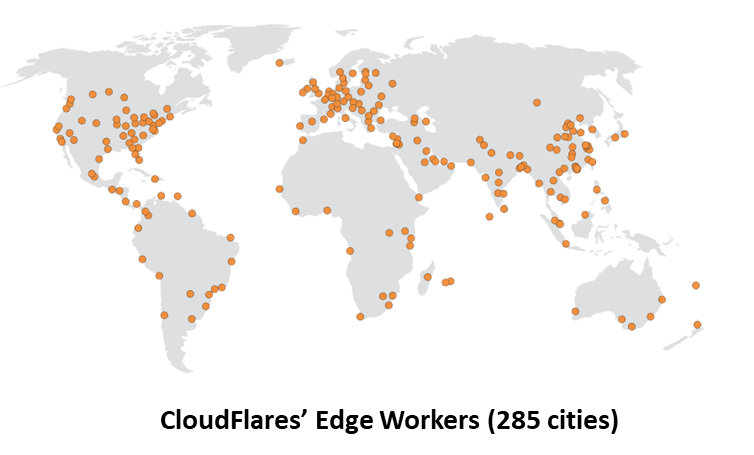

## Using CloudFlares' Workers

Allows custom logic to be deployed without the need to worry about regions, VMs, servers, containers, or load balancers.

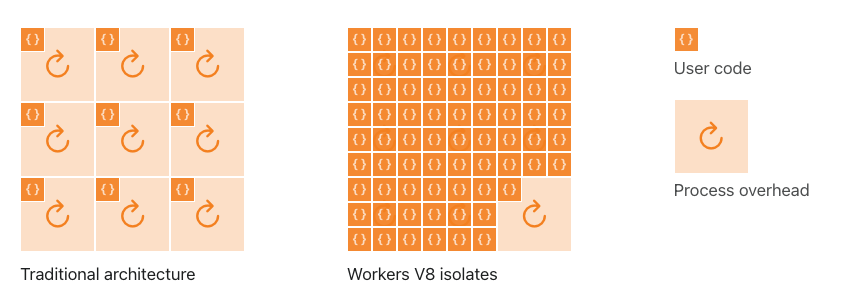

Isolates is a form of virtual machine built by the Google Chrome team to power "V8, the Javascript engine in the Chrome browser."
A single process running in an isolate can run hundreds or thousands of workers and seamlessly switch between them.

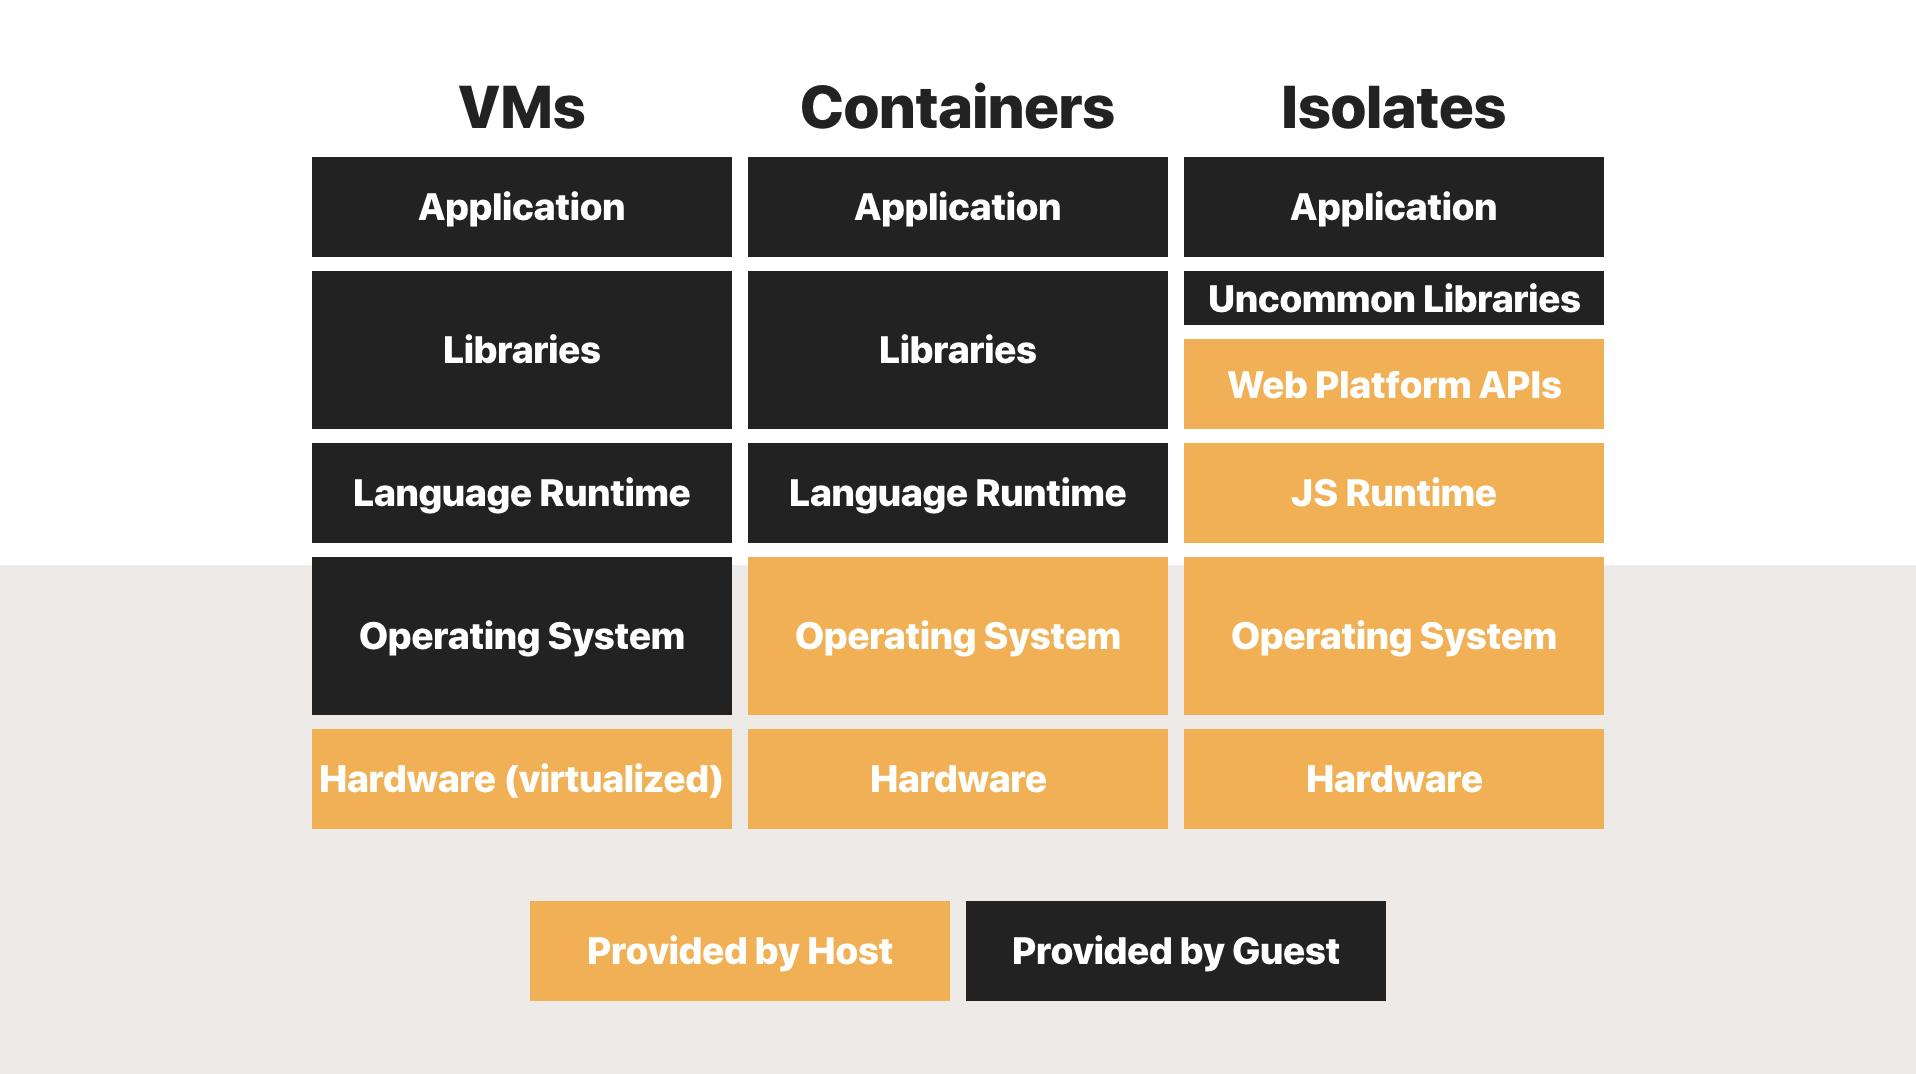



This is a code sample to create a Worker on Cloudflares

```rust
use worker::*;

#[event(fetch)]
async fn main(req: Request, env: Env, ctx: Context) -> Result<Response> {
    Response::ok("Hello, World...")
}

```

Wrangler is a tool from CloudFlares' to build, and deploy Workers on their platform.

Using wrangler, it becomes simple to build and publish our WASM as a Worker on their edge computing platform.
```bash
wrangler build && wrangler publish
```

# Distributed Location Testing

(No content to show)

Tools used: GeoPeek, CloudFlares' Console